# Programação Inteira (PI)

## Definição

Um problema de **programação inteira** pode ser escrito como:

$$
\begin{aligned}
\max \quad & c^T x \\
\text{sujeito a} \quad & A x \leq b, \\
& x \in \mathbb{Z}^n.
\end{aligned}
$$

onde:

* $x \in \mathbb{Z}^n$ é o vetor de variáveis **inteiras** (não necessariamente binárias);
* $c \in \mathbb{R}^n$ e $b \in \mathbb{R}^m$ são vetores de coeficientes;
* $A \in \mathbb{R}^{m \times n}$ é a matriz de restrições.

## Características Fundamentais

1. **Diferença para PL**:

   * Em PL: $x \in \mathbb{R}^n$ (variáveis contínuas).
   * Em PI: $x \in \mathbb{Z}^n$ (variáveis restritas a inteiros).
   * A região factível deixa de ser um poliedro convexo e passa a ser um conjunto **discreto** de pontos.

2. **Complexidade**:

   * Enquanto PL pode ser resolvido em tempo polinomial (Simplex, pontos interiores),
   * PI é, em geral, **NP-difícil**.

3. **Soluções Ótimas**:

   * Nem sempre ocorrem nos vértices do poliedro contínuo.
   * Pode ser necessário explorar combinações inteiras via **enumeração**, **branch-and-bound**, **cutting planes**, etc.

## Exemplo de PI

$$
\begin{aligned}
\max \quad & z = 3x_1 + 2x_2 \\
\text{sujeito a} \quad & x_1 + x_2 \leq 4, \\
& x_1 + 2x_2 \leq 5, \\
& x_1, x_2 \in \mathbb{Z}_{\geq 0}.
\end{aligned}
$$

* A versão **linear (PL)** tem solução ótima $(4,0)$ com $z=12$.
* Mas se exigirmos que $x_1, x_2$ sejam inteiros, a solução ótima continua em $(4,0)$ (porque já era inteira).
* Em outros casos, a solução ótima de PL **não é inteira**, e aí precisamos escolher um ponto inteiro vizinho factível.

**Importante**

* **PL** → otimização contínua sobre um poliedro convexo.
* **PI** → otimização discreta sobre pontos inteiros factíveis.
* A mudança parece simples, mas muda totalmente a **dificuldade computacional** e as técnicas de solução.

## Exemplo em $\mathbb{R}^2$:

$$
\begin{aligned}
\max \quad & x_1 + x_2 \\
\text{st.} \quad & x_1 + 2x_2 \leq 2 \\
           & 2x_1 + x_2 \leq 2 \\
           & 2x_1, x_2 \geq 0 \\
           & x_1,x_2\in\mathbb{Z}_{\ge 0}
\end{aligned}
$$


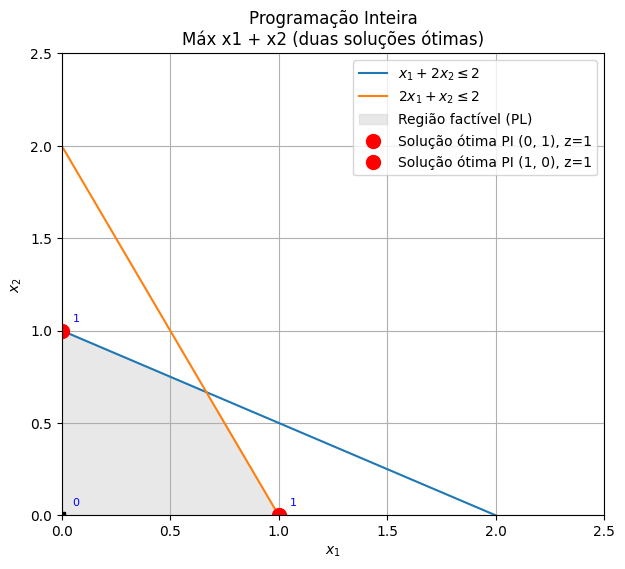

([(0, 1), (1, 0)], 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Problema de Programação Inteira
# max z = x1 + x2
# sujeito a:
# x1 + 2x2 <= 2
# 2x1 + x2 <= 2
# x1, x2 >= 0, inteiros

x1_vals = range(0, 6)
x2_vals = range(0, 6)

candidatos = []
for x1, x2 in product(x1_vals, x2_vals):
    if (x1 + 2*x2 <= 2) and (2*x1 + x2 <= 2):
        z = x1 + x2
        candidatos.append((x1, x2, z))

# Encontrar valor ótimo
z_opt = max(candidatos, key=lambda t: t[2])[2]
# Filtrar todas as soluções ótimas
opt_solutions = [(x1, x2) for (x1, x2, z) in candidatos if z == z_opt]

# Preparar restrições para plot
x = np.linspace(0, 2.5, 400)
y1 = (2 - x) / 2     # x1 + 2x2 <= 2
y2 = 2 - 2*x         # 2x1 + x2 <= 2

plt.figure(figsize=(7,6))
plt.plot(x, y1, label=r"$x_1 + 2x_2 \leq 2$")
plt.plot(x, y2, label=r"$2x_1 + x_2 \leq 2$")

# Região factível contínua (PL)
y3 = np.minimum(y1, y2)
y3 = np.maximum(y3, 0)
plt.fill_between(x, 0, y3, where=(y3>=0), color="lightgray", alpha=0.5, label="Região factível (PL)")

# Pontos factíveis inteiros
for (x1, x2, z) in candidatos:
    plt.plot(x1, x2, "ks", markersize=5)
    plt.text(x1+0.05, x2+0.05, f"{z}", fontsize=8, color="blue")

# Destacar todas soluções ótimas inteiras
for (x1, x2) in opt_solutions:
    plt.plot(x1, x2, "ro", markersize=10, label=f"Solução ótima PI ({x1}, {x2}), z={z_opt}")

plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Programação Inteira\nMáx x1 + x2 (duas soluções ótimas)")
plt.legend()
plt.grid(True)
plt.show()

opt_solutions, z_opt


## Solução para o exemplo

$$
\begin{aligned}
\max \quad & z = 3x_1 + 2x_2 \\
\text{st.} \quad & x_1 + x_2 \leq 4, \\
& x_1 + 2x_2 \leq 5, \\
& x_1, x_2 \in \mathbb{Z}_{\geq 0}.
\end{aligned}
$$


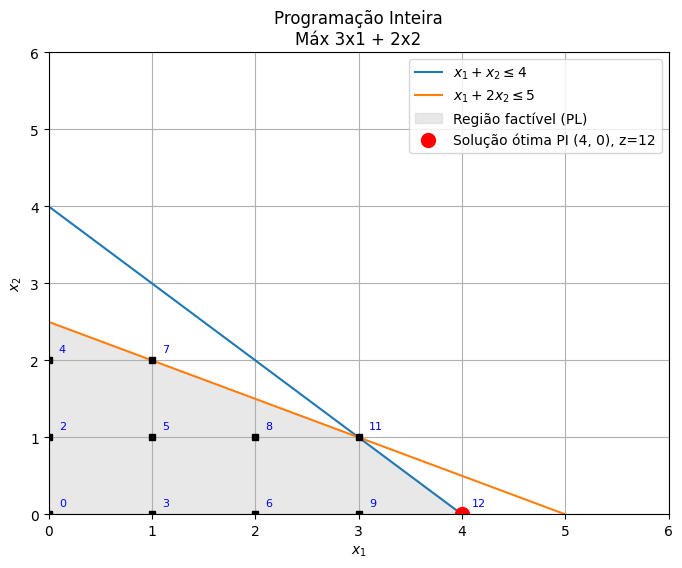

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Definição do problema de Programação Inteira
# max z = 3x1 + 2x2
# sujeito a:
# x1 + x2 <= 4
# x1 + 2x2 <= 5
# x1, x2 >= 0, inteiros

# Geração de candidatos inteiros (grid pequeno)
x1_vals = range(0, 3)
x2_vals = range(0, 3)

candidatos = []
for x1, x2 in product(x1_vals, x2_vals):
    if x1 + x2 <= 4 and x1 + 2*x2 <= 5:
        z = 3*x1 + 2*x2
        candidatos.append((x1, x2, z))

# Encontrar ótimo
opt = max(candidatos, key=lambda t: t[2])
x1_opt, x2_opt, z_opt = opt

# Preparar restrições para plot
x = np.linspace(0, 6, 400)
y1 = 4 - x
y2 = (5 - x)/2

# Plot
plt.figure(figsize=(8,6))
plt.plot(x, y1, label=r"$x_1 + x_2 \leq 4$")
plt.plot(x, y2, label=r"$x_1 + 2x_2 \leq 5$")

# Região factível contínua (para comparação)
y3 = np.minimum(y1, y2)
y3 = np.maximum(y3, 0)
plt.fill_between(x, 0, y3, where=(y3>=0), color="lightgray", alpha=0.5, label="Região factível (PL)")

# Pontos factíveis inteiros
for (x1, x2, z) in candidatos:
    plt.plot(x1, x2, "ks", markersize=5)
    plt.text(x1+0.1, x2+0.1, f"{z}", fontsize=8, color="blue")

# Solução ótima inteira
plt.plot(x1_opt, x2_opt, "ro", markersize=10, label=f"Solução ótima PI ({x1_opt}, {x2_opt}), z={z_opt}")

plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Programação Inteira\nMáx 3x1 + 2x2")
plt.legend()
plt.grid(True)
plt.show()
